# Python for Data Science
## Session 8
### Plotting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco', 
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)
df.head(5)

,Student Name,Course,Grade,Gender,Study Time,Age
0,Amelie,Artificial Intelligence,85,Female,15,22
1,Edgar,Python for Data Science,92,Male,20,21
2,Jordi,Cloud Computing,78,Male,10,23
3,Marçal,Computer Vision,88,Male,8,22
4,Pep,Artificial Intelligence,91,Male,18,20


## Plotting 
### Seaborn

Home exercises. Note that you may need to also use pandas to answer some of the questions. 

1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?

5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

In [2]:
df

,Student Name,Course,Grade,Gender,Study Time,Age
0,Amelie,Artificial Intelligence,85,Female,15,22
1,Edgar,Python for Data Science,92,Male,20,21
2,Jordi,Cloud Computing,78,Male,10,23
3,Marçal,Computer Vision,88,Male,8,22
4,Pep,Artificial Intelligence,91,Male,18,20
5,Jaume,Python for Data Science,84,Male,14,24
6,Marco,Cloud Computing,73,Male,11,22
7,Ludmila,Computer Vision,95,Female,16,21
8,Bastian,Artificial Intelligence,90,Male,19,23
9,Marc,Python for Data Science,80,Male,13,21


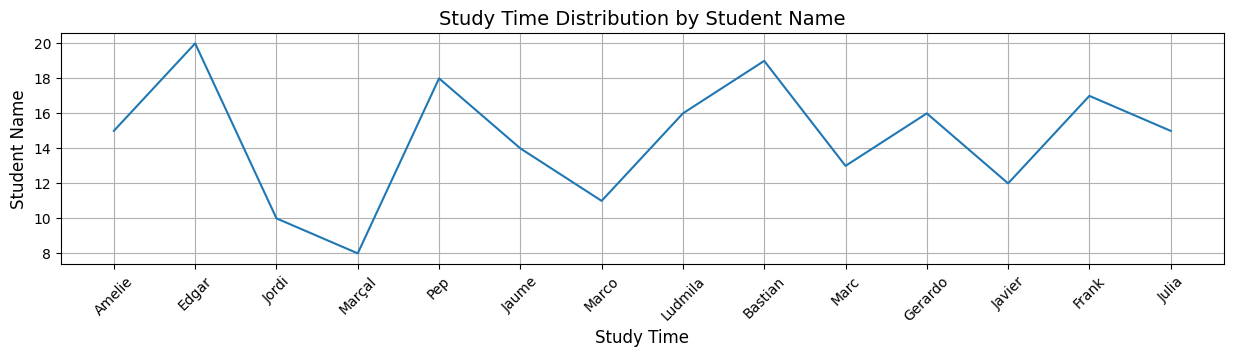

The student with the highest student time is Edgar with 20 hours


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))

sns.lineplot(df, x='Student Name', y='Study Time')

plt.title('Study Time Distribution by Student Name', fontsize=14)
plt.xlabel('Study Time', fontsize=12)
plt.ylabel('Student Name', fontsize=12)
plt.grid('on')
plt.xticks(rotation=45)
plt.show()

#Get which student has the highest study time
most_study = df.loc[df['Study Time'].idxmax()]
print(f'The student with the highest student time is {most_study['Student Name']} with {most_study['Study Time']} hours')

2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

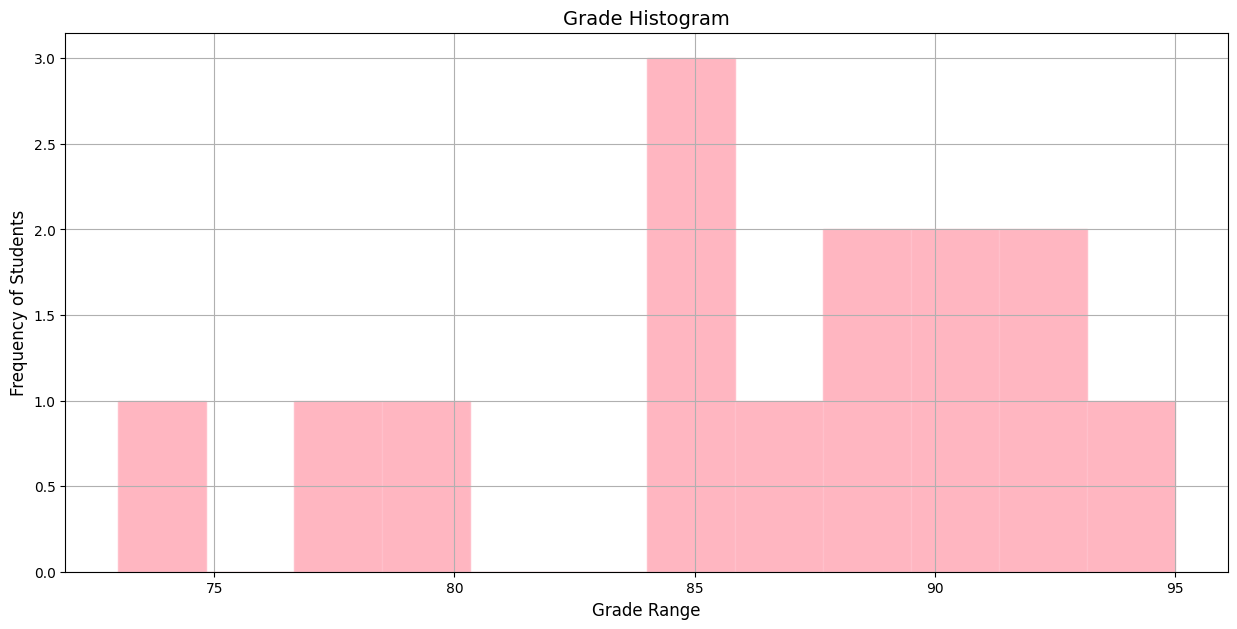

The grade range with the highest frequency of students is from 84 to 86


In [4]:
plt.figure(figsize=(15,7))
x, y, z = plt.hist(df['Grade'], bins=12, color='lightpink', edgecolor='pink')
plt.title('Grade Histogram', fontsize=14)
plt.xlabel('Grade Range', fontsize=12)
plt.ylabel('Frequency of Students', fontsize=12)
plt.grid('on')
plt.show()

#Determine the grade range with highest frequency of students
max_index = np.argmax(x)
grade_range = (y[max_index], y[max_index+1])

print(f'The grade range with the highest frequency of students is from {grade_range[0]:.0f} to {grade_range[1]:.0f}')

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

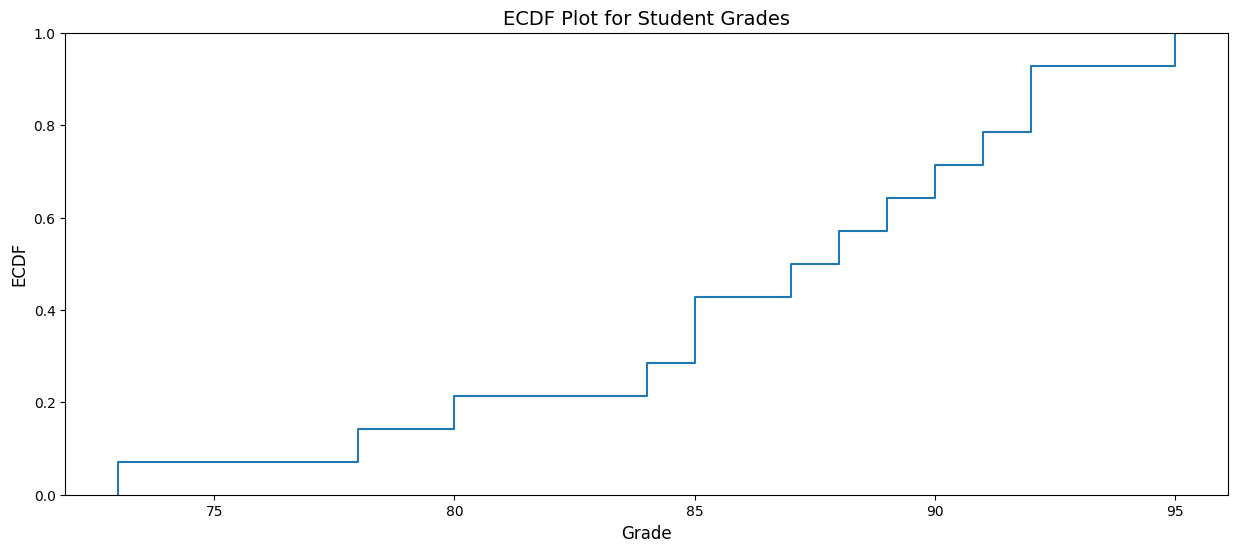

There are 28.57% students who scored less than 85


In [5]:
plt.figure(figsize=(15,6))
sns.ecdfplot(df, x='Grade')
plt.title('ECDF Plot for Student Grades', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('ECDF', fontsize=12)
plt.show()

less_85 = (df['Grade'] < 85).mean() * 100
print(f'There are {less_85:.2f}% students who scored less than 85')

4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?

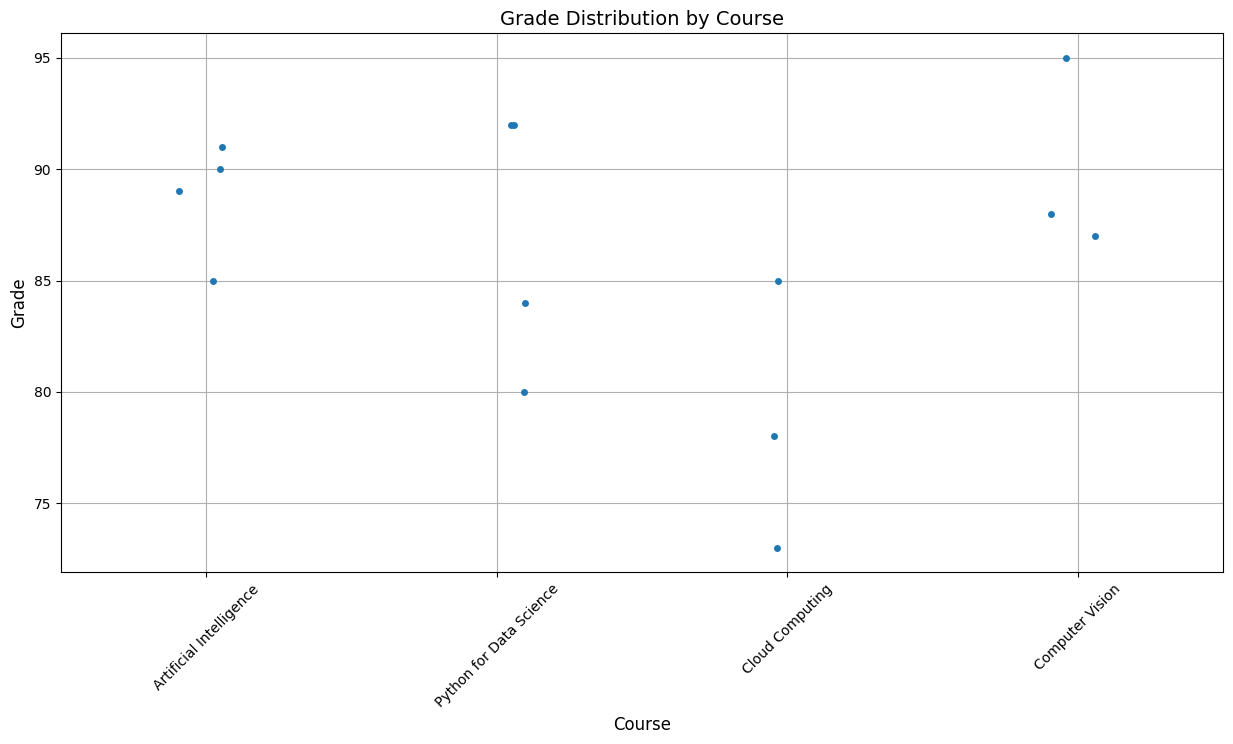

Cloud Computing has the most spread in grades


In [6]:
plt.figure(figsize=(15,7))
sns.stripplot(df, x='Course', y='Grade')
plt.title('Grade Distribution by Course', fontsize=14)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Grade', fontsize=12)
plt.xticks(rotation=45)
plt.grid('on')
plt.show()

#Group by course and calculate standard dev
course_spread = df.groupby('Course')['Grade'].std().idxmax()
print(f'{course_spread} has the most spread in grades')

5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

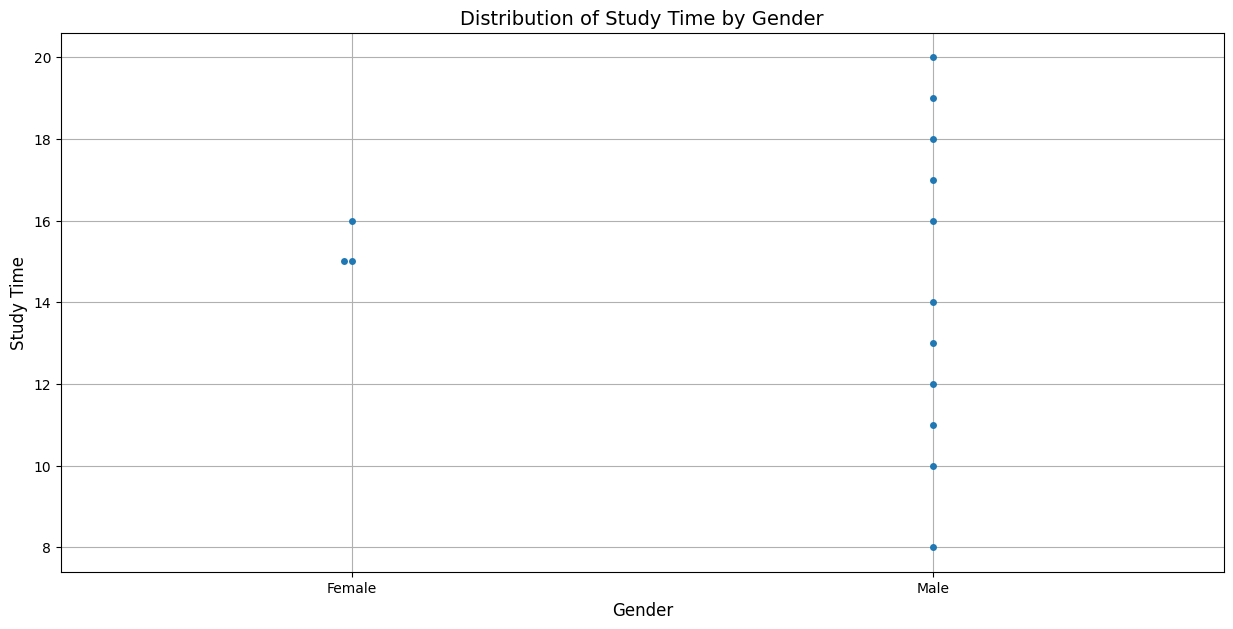

Female gender has the higher average study time with 15.33 hours


In [7]:
plt.figure(figsize=(15,7))
sns.swarmplot(df, x='Gender', y='Study Time')
plt.title('Distribution of Study Time by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Study Time', fontsize=12)
plt.grid('on')
plt.show()

#Group by gender and calculate the mean
avg_studytime = df.groupby('Gender')['Study Time'].mean()
print(f'{avg_studytime.idxmax()} gender has the higher average study time with {avg_studytime['Female']:.2f} hours')

6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

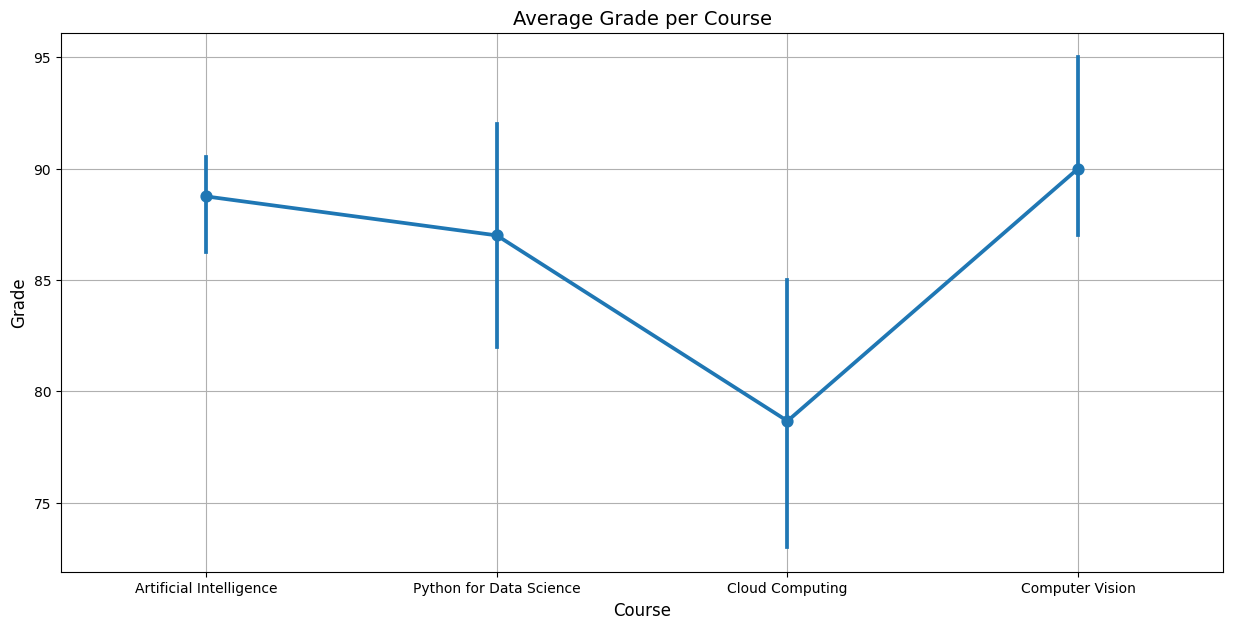

The Computer Vision course has the highest grade with 90.0


In [8]:
plt.figure(figsize=(15,7))
sns.pointplot(df, x='Course', y='Grade', estimator='mean', markers='o')
plt.title('Average Grade per Course', fontsize=14)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Grade', fontsize=12)
plt.grid('on')
plt.show()

#Group by course and calculate mean
course_grade = df.groupby('Course')['Grade'].mean()
print(f'The {course_grade.idxmax()} course has the highest grade with {course_grade.max()}')